# 사용할 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 시각화
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from collections import Counter

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette = 'deep')

# 캐글 데이터 불러오기

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
IDinfo = pd.read_csv('gender_submission.csv')

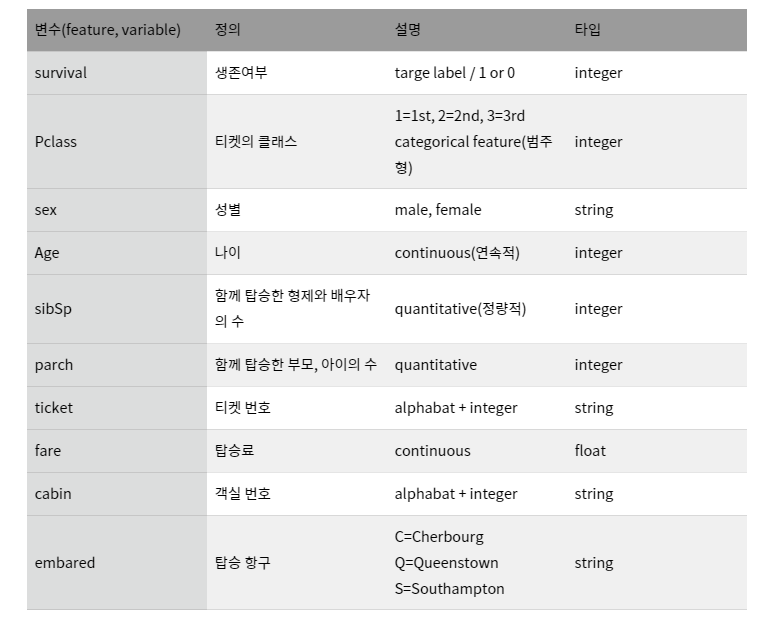

# EDA

In [5]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.isnull().um() # 전체 Null 값 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

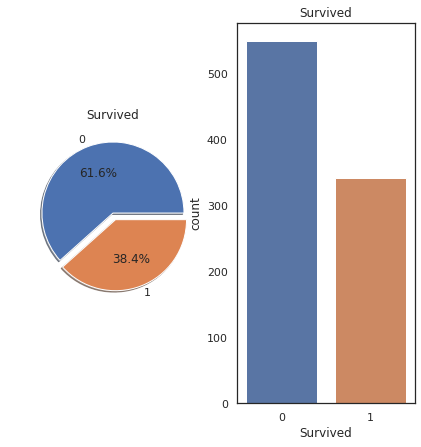

In [ ]:
# 생존 확인하기

f, ax = plt.subplots(1, 2, figsize = (7, 7))

train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel(' ')

sns.countplot(x = 'Survived', data = train, ax = ax[1]) # countplot: 이산값을 나타내는 그래프, 각 범주에 속하는 데이터의 개수를 막대 그래프로 나타냄
ax[1].set_title('Survived')

plt.show()

많은 탑승객들이 생존 x
Training Set의 891명 탑승객 중 약 350명(38.4%)만 생존


## Feature

### Sex (성별)

In [ ]:
train.groupby(['Sex','Survived'])['Survived'].count().to_frame()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

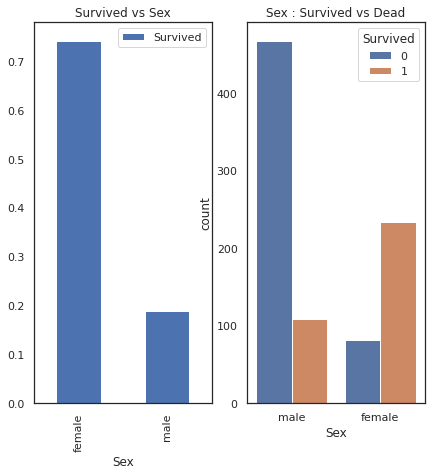

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(7, 7))

train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x = 'Sex', hue = 'Survived', data = train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

남자 탑승객의 수가 여자 탑승객의 수보다 훨씬 많음

but, 여자 생존 탑승객의 수가 남자 생존 탑승객의 수보다 거의 두배 많음
여성의 생존률: 약 75% 정도 /  남자의 생존률: 18~19% 정도

### Pclass (티켓 클래스)

In [ ]:
pd.crosstab(train.Pclass, train.Survived, margins = True).style.background_gradient(cmap='Oranges_r') # crosstab: 범주형 변수 기준, 개수 파악 or 수치혀여 데이터 조합 -> 계산

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Plcass : Survived vs Dead.')

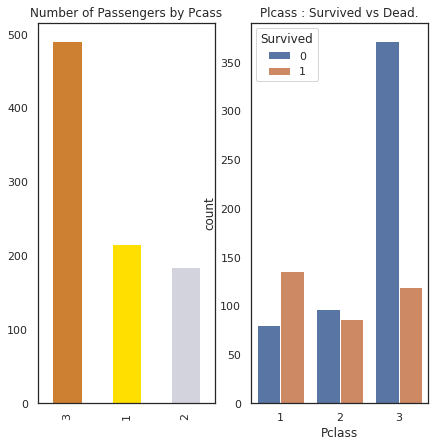

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (7, 7))

train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3DE'], ax = ax[0])
ax[0].set_title('Number of Passengers by Pcass')
ax[0].set_ylabel('')

sns.countplot(x = 'Pclass', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Plcass : Survived vs Dead.')

Pclass 1의 생존률: 63% 정도

Pclass 2의 생존률: 48% 정도

Pclass 3의 생존률: 25% 정도 (탑승객 수가 훨씬 많았음)

In [ ]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap='Oranges_r')  # crosstab: 범주형 변수 기준, 개수 파악 or 수치혀여 데이터 조합 -> 계산

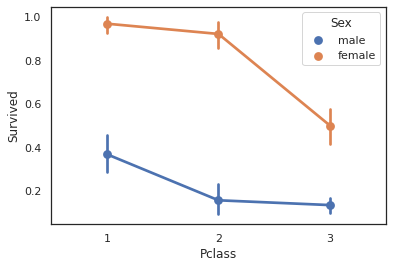

In [ ]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue='Sex', data = train)

plt.show()

Pclass와 무관하게, 여성이 구조에 있어서 우선 순위



### Age (연령)

In [ ]:
print('Oldest Passenger was of: ', train['Age'].max(),'Years')
print('Youngest Passeger was of: ', train['Age'].min(),'Years')
print('Average Age on the ship: ', train['Age'].mean(), 'Years')

Oldest Passenger was of:  80.0 Years
Youngest Passeger was of:  0.42 Years
Average Age on the ship:  29.69911764705882 Years


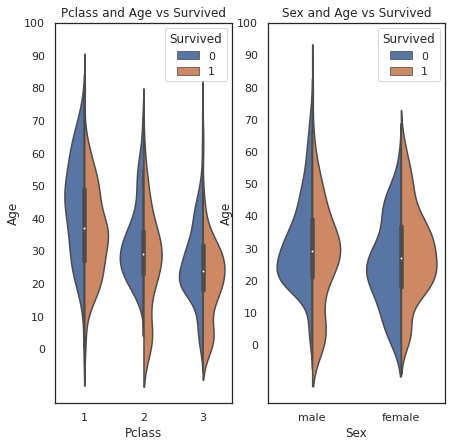

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (7, 7))

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = ax[0]) # 바이올린 플롯 (Violin plot): 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = train, split = True,  ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

관찰결과 :

1) Pclass 등급이 낮아짐(1 to 3)에 따라 어린이의 수는 증가,

10세 이하의 탑승객 수는 Pclass 수와 관계 없이 괜찮음

2) 20-50세 사이의 Pclass 1 탑승객 생존률이 높고, 여성의 경우에는 더욱 높음

3) 남성은 연령이 증가할수록 생존 확률 하락


Age Feature는 177개의 Null 값

Name: Mr와 Mrs 와 같은 salutation이 존재

-> Mr와 Mrs 의 평균 값을 각각의 그룹에 부여


In [ ]:
train['Initial'] = 0
train['Initial'] = train.Name.str.extract('([A-aZ-z]+)\.') # salutation을 추출합니다.

In [ ]:
pd.crosstab(train.Initial, train.Sex).T.style.background_gradient(cmap = 'Oranges_r') # 성별에 따른 Initial 체크

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt', 'Sir','Don'],
                                  ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [ ]:
train.groupby('Initial')['Age'].mean() # Initial 에 따른 평균 연령 체크

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
## 평균의 올림 값들로 NaN 값에 할당
train.loc[(train.Age.isnull()) & (train.Initial == 'Mr') , 'Age'] = 33
train.loc[(train.Age.isnull()) & (train.Initial == 'Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull()) & (train.Initial == 'Master'), 'Age'] = 5
train.loc[(train.Age.isnull()) & (train.Initial == 'Miss'), 'Age'] = 22
train.loc[(train.Age.isnull()) & (train.Initial == 'Other'), 'Age'] = 46

In [ ]:
train.Age.isnull().any() # Null 값들이 완전히 제거

False

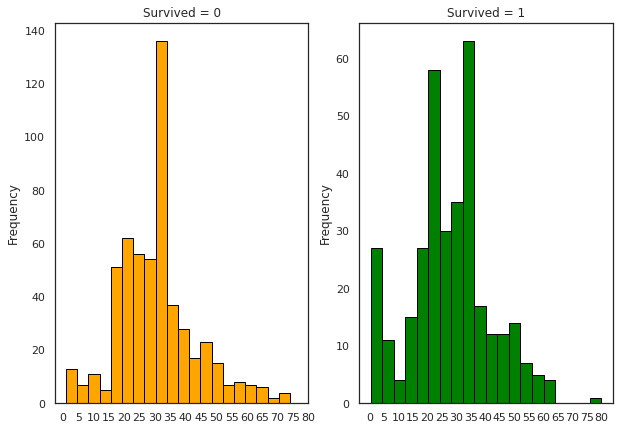

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 7))

train[train['Survived']==0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'orange')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

train[train['Survived']==1].Age.plot.hist(ax = ax[1], bins = 20, edgecolor = 'black', color = 'green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

관찰결과 :

1) 5세 이하의 아이들은 많이 생존

2) 가장 고연령 탑승객도 생존 (ex: 80세)

3) 가장 많은 수의 사망자가 있는 연령 그룹은 30-40세

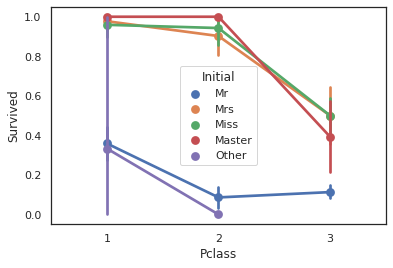

In [ ]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Initial', data = train)
plt.show()

### Embarked(탑승항구) → Categorical Value

In [ ]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins =True).style.background_gradient(cmap = 'Oranges_r')

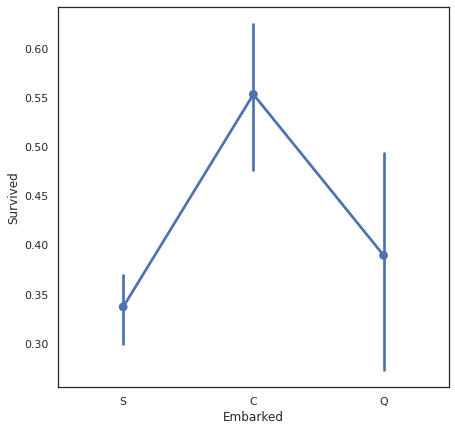

In [ ]:
# 탑승 항구에 따른 생존 확률
sns.pointplot(x = 'Embarked', y = 'Survived', data = train)
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

C항구의 생존률이 약 0.55 정도로 가장 높고, S항구가 가장 낮음

-> C > Q > S (생존확률 높은 순)

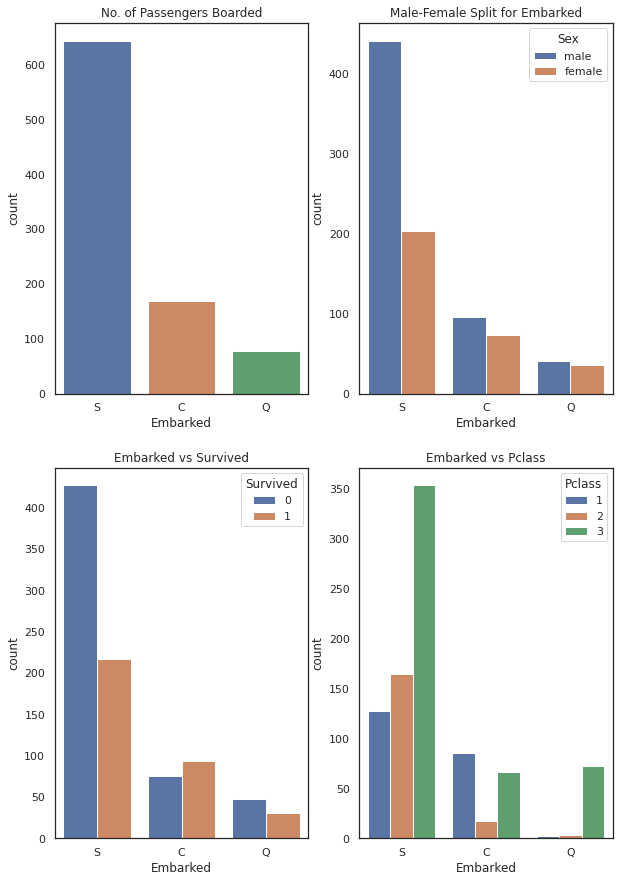

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(10, 15))

sns.countplot(x = 'Embarked', data = train, ax = ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')

sns.countplot(x = 'Embarked', hue ='Sex', data = train, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot(x = 'Embarked', hue='Survived', data=train, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x = 'Embarked', hue = 'Pclass', data = train, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.show()

관찰결과 :

1) S항구: 가장 많은 승객이 탑승, 탑승객들의 대부분 Pclass 3

2) C항구: 탑승한 승객은 생존률이 높음. (Pclass 1과 2의 승객)

3) S항구: 다수의 부유한 사람들이 탑승, 이 그룹의 생존률은 낮은데, 약 81%가 생존하지 못한 Pclass 3의 승객

4) Q항구: 탑승한 승객의 95% 가량이 Pclass 3

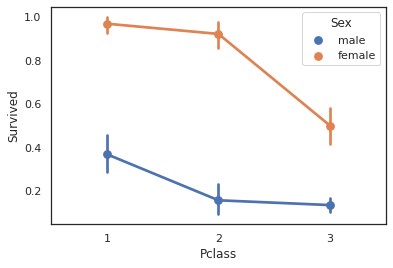

In [ ]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train)
plt.show()

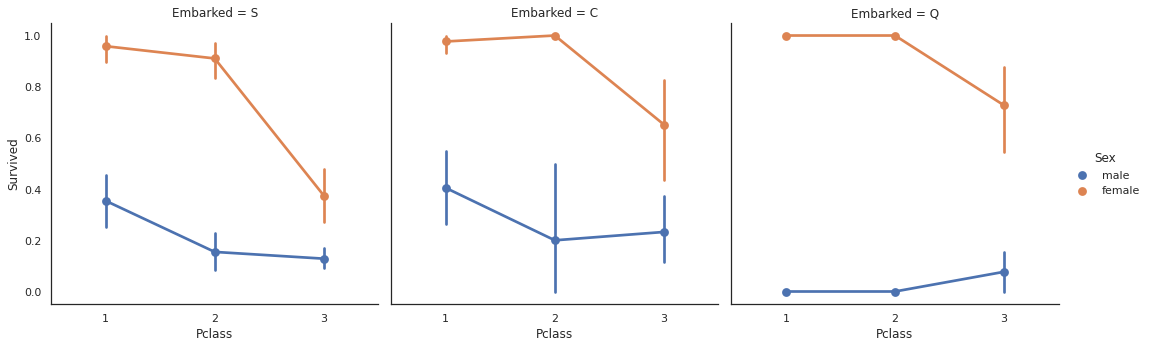

In [ ]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', col = 'Embarked', data = train, kind = "point", linestyles = "-")
plt.show()

관찰결과 :

1) Pclass 1과 Pclass2 여성의 생존률은 Pclass와 관계 없이 거의 1

2) S 항구에서 탑승한 Pclass 3의 탑승객은 남성과 여성의 생존률이 모두 낮음

3) Q 항구에서 탑승한 남성 대부분이 Pclass 3 탑승객

In [ ]:
# Embarked 의 NaN 채우기

train['Embarked'].fillna('S', inplace = True) # 탑승객 대부분이 S라서 S로 채워주기

In [ ]:
train['Embarked'].isnull().any() # NaN 모두 제거

False

### SibSp(가족관계) → Discrete Feature

탑승객 유형 (가족관계)

Sibling → 형제자매

Spouse → 배우자

In [ ]:
pd.crosstab([train.SibSp], train.Survived).style.background_gradient(cmap = 'Oranges_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


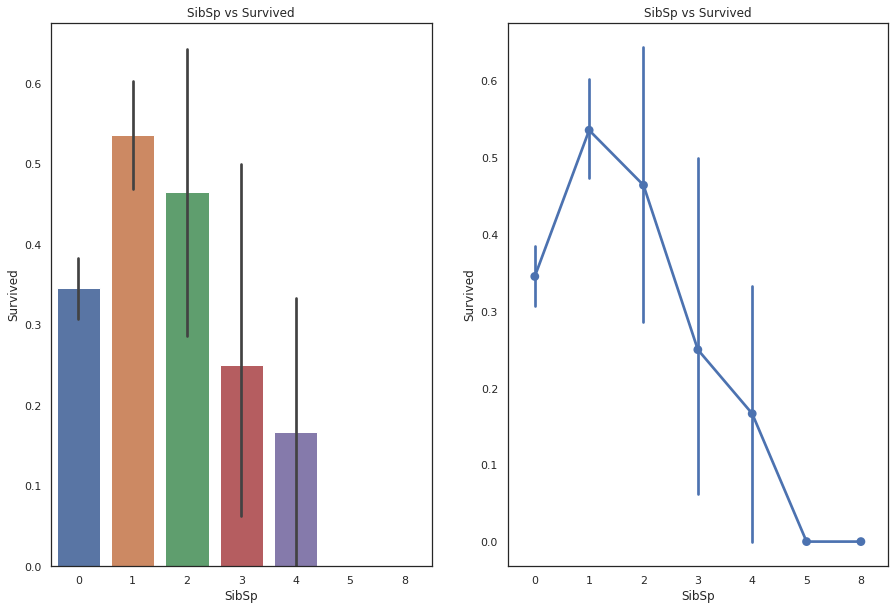

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15,10))

sns.barplot(x = 'SibSp', y = 'Survived', data = train, ax = ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot(x = 'SibSp', y = 'Survived', data = train, ax = ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [ ]:
pd.crosstab(train.SibSp, train.Pclass).style.background_gradient(cmap = 'Oranges_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


관찰결과 :

혼자 탑승: 생존률이 34.5% 정도

그래프의 기울기는 동반 탑승자가 증가하면 그래프의 기울기는 감소

but, 동반 탑승자수가 5-8명인 경우에는 생존률이 0% (why?: Pclass)

원인은 Pclass

crosstab: SibSp > 3 인 경우 모두 Pclass 3에 속함
Pclass 3의 3명 초과 가족들은 모두 사망

### Parch (동반 탑승한 부모/자식의 수)

In [ ]:
pd.crosstab(train.Parch, train.Pclass).style.background_gradient(cmap = 'Oranges_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab: 동반 탑승자가 많은 가족들 Pclass3에 속함

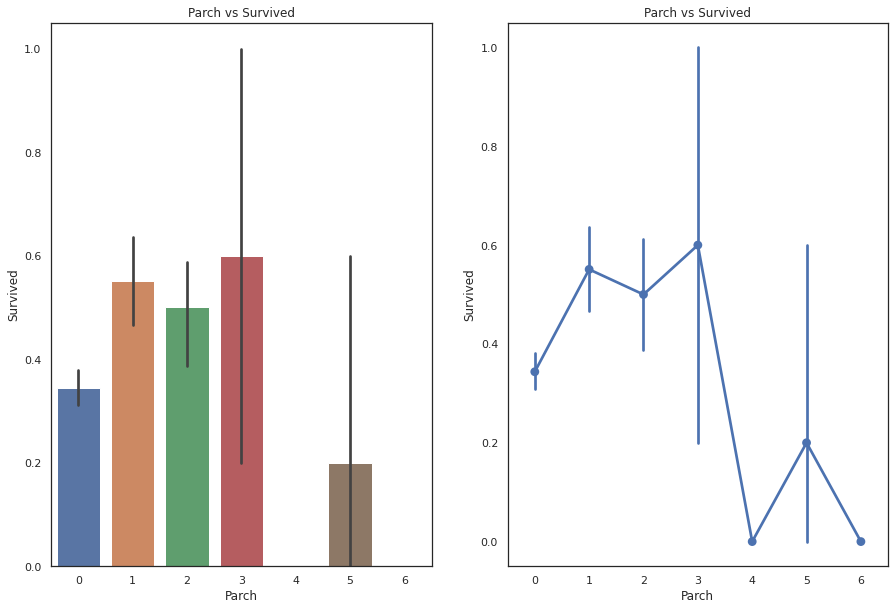

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15,10))

sns.barplot(x = 'Parch', y = 'Survived', data = train, ax = ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x = 'Parch', y = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

관찰결과 :
부모님, 아이와 함꼐 탑승한 승객들의 생존 확률은 높음

but 그 수가 증가할 수록 생존률은 감소

1-3명의 부모님, 아이와 탑승한 승객의 생존률이 높음

혼자 탑승하는 경우, 가족이 4명이상 탑승한 경우에도 생존률은 감소

### Fare (탑승료) --> Continuous Feature

In [ ]:
print('Highest Fare was: ', train['Fare'].max())
print('Lowest Fare was: ', train['Fare'].min())
print('Average Fare was: ', train['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


Text(0.5, 1.0, 'Fare in Pclass 3')

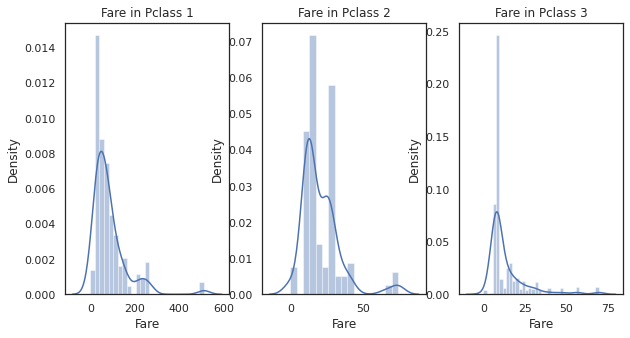

In [ ]:
f, ax = plt.subplots(1,3, figsize=(10,5))

sns.distplot(train[train['Pclass']==1].Fare, ax = ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(train[train['Pclass']==2].Fare, ax = ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(train[train['Pclass']==3].Fare, ax = ax[2])
ax[2].set_title('Fare in Pclass 3')

-> 이 변수는 연속형이기 때문에, binning을 통해 이산형 값들로 변환

Feature들의 관찰 결과 요약 :

1) Sex (성별): 여성의 생존확률이 남성에 비해 높음


2) Pclass (클래스):1st 클래스 탑승객의 생존률 높은 경향/ Pclass 3의 생존률 매우 낮음

여성: Pclass 1 탑승객의 생존률은 거의 1이었고, Pclass 2의 경우에도 높음


3) Age (연령) : 5-10세보다 적은 어린이들의 생존확률이 높음 / 15-35세의 탑승객들은 사망 확률 높음


4) Embarked (항구): 다수의 Pclass 1 탑승객이 S에서 제일 많았지만, C에서 탑승한 승객의 생존률이 더 높음

Q에서 탑승한 승객은 거의 다 Pclass 3 에 속함


5) Parch + SibSp (동반 탑승자): 1-2명의 형제자매, 1-3명의 가족, 자녀와 함께 탑승한 경우가 혼자 탑승 또는 많은 수의 가족과 함께 탑승한 경우보다 훨씬 생존률이 높음

### Correlation Between The Features

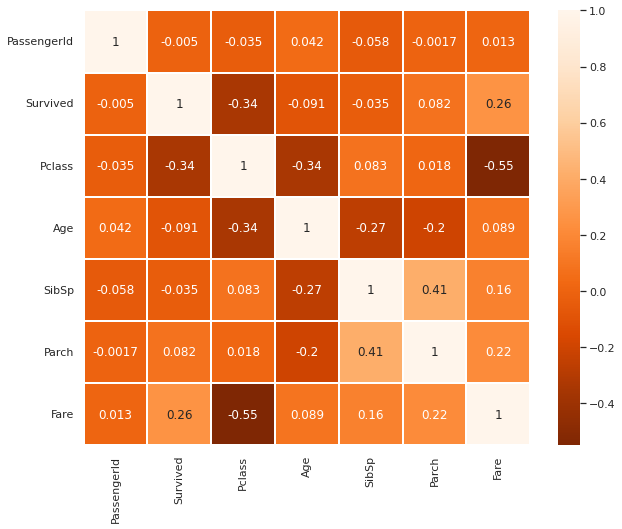

In [ ]:
sns.heatmap(train.corr(), annot = True, cmap = 'Oranges_r', linewidths = 0.2) ## data.corr() --> 상관관계 행렬
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Heatmap의 해석:

feature들간의 상관관계는 그렇게 높아보이지 않음
가장 높은 상관관계를 지닌 두 변수는 SibSp와 Parch로 상관계수는 0.41

### Feature Engineering and Data Cleansing

### Age_band

contiunous 값을 category값으로 Binning이나 Normalization을 통해 변환
binning을 통해 연령에 하나의 값을 할당

최대 연령이 80세이기 떄문에, 0부터 80세까지의 연령을 5개의 bin
 80/5 = 16 이기 때문에, bin하나의 사이즈는 16을 지정

In [ ]:
train['Age_band'] = 0

train.loc[train['Age'] <= 16, 'Age_band'] = 0
train.loc[ (train['Age'] > 16) & (train['Age'] <=32), 'Age_band'] = 1
train.loc[ (train['Age'] > 32) & (train['Age'] <=48), 'Age_band'] = 2
train.loc[ (train['Age'] > 48) & (train['Age'] <=64), 'Age_band'] = 3
train.loc[ train['Age'] > 64, 'Age_band'] = 4

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [ ]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer') # 각 연령구간의 탑승객 수 체크

,Age_band
1,382
2,325
0,104
3,69
4,11


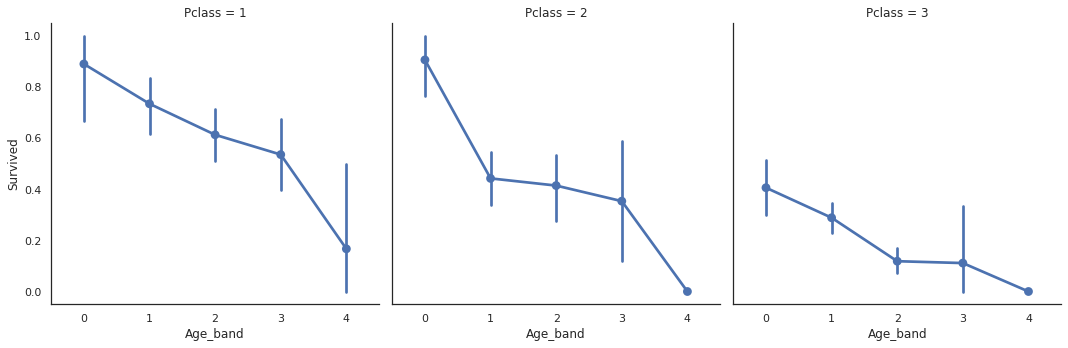

In [ ]:
sns.catplot(x = 'Age_band', y = 'Survived', data = train, col = 'Pclass', kind = "point", linestyles = "-")
plt.show()

Pclass와 관계없이 연령이 증가할수록 생존률이 낮아짐

### Family_Size 와 Alone


Parch와 SibSp의 요약

Alone은 승객이 혼자인지 아닌지

In [ ]:
train['Family_Size'] = 0
train['Family_Size'] = train['Parch'] + train['SibSp'] # Family_Size
train['Alone'] = 0
train.loc [train.Family_Size ==0, 'Alone'] = 1 # Alone

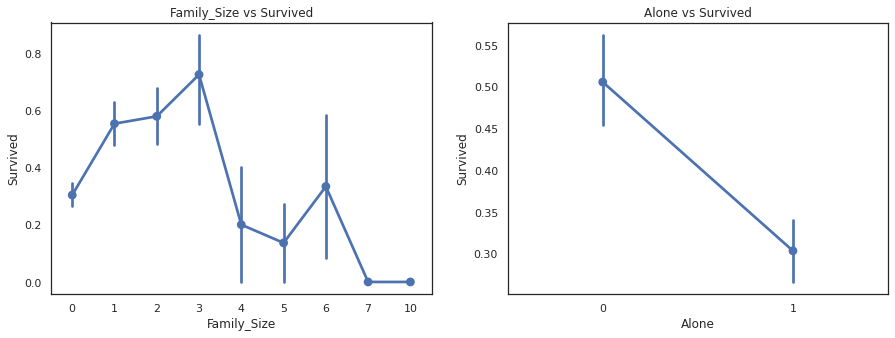

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15,5))

sns.pointplot(x = 'Family_Size', y = 'Survived', data = train, ax = ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.pointplot(x = 'Alone', y = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

Family_Size = 0 은 탑승객이 혼자임

-> 혼자일 때, 생존률은 매우 낮음

가족 수가 4명 이상일 때도 생존률은 감소

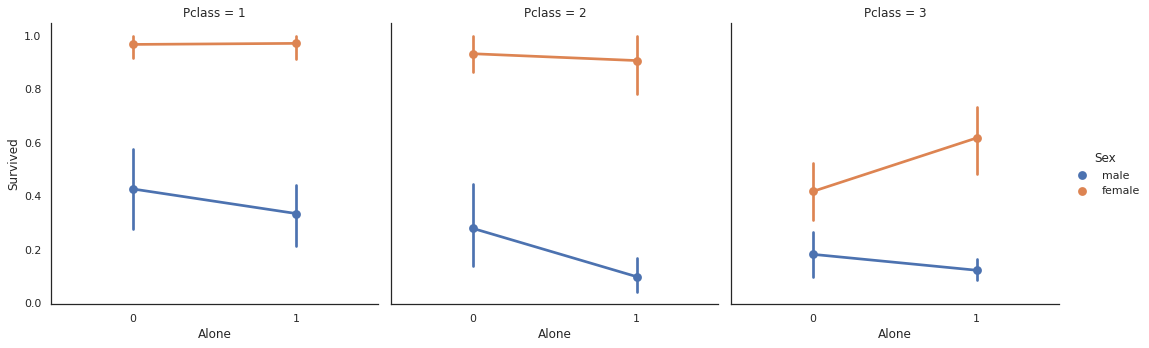

In [ ]:
sns.catplot(x = 'Alone', y = 'Survived', data = train, hue = 'Sex', col = 'Pclass', kind = "point", linestyles = "-")
plt.show()

Pclass와 무관하게 혼자 탑승한 경우는 위험

but 예외적으로 Pclass 3 여성 탑승객의 생존률은 가족과 함께 탑승하지 않은 경우보다 오히려 높음

### Fare_Range (요금)


Fare_Range가 증가할 수록 생존률도 증가

In [ ]:
train['Fare_Range'] = pd.qcut(train['Fare'], 4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'Oranges_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
train['Fare_cat'] = 0
train.loc[train['Fare'] <= 7.91, 'Fare_cat'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare']<=14.454), 'Fare_cat'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare']<=31), 'Fare_cat'] = 2
train.loc[(train['Fare'] > 31) & (train['Fare']<=513), 'Fare_cat'] = 3

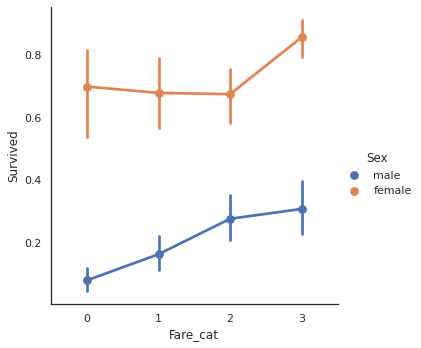

In [ ]:
sns.catplot(x = 'Fare_cat', y = 'Survived', data = train, hue = 'Sex', kind = "point", linestyles = "-")
plt.show()

Fare_cat 이 증가할수록 생존률이 증가

### 문자열 값을 숫자형으로 변환

In [ ]:
train['Sex'].replace(['male','female'], [0, 1], inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

### 필요하지 않은 Feature를 drop

Name → Categorical value로 변환할 수 없으므로 필요 없음

Age → Age_band가 있기 때문에 필요 없음

Ticket → 카테고리화 될 수 없는 무작위 문자열

Fare → Fare_cat이 있기 때문에 필요없음

Cabin → NaN 값이 너무 많고, 많은 승객에 따라 cabin 값이 많음 -> 필요 없음

Fare_Range → Fare_cat이 있어서 필요 없음

PassengerId → 카테고리화 될 수 없음

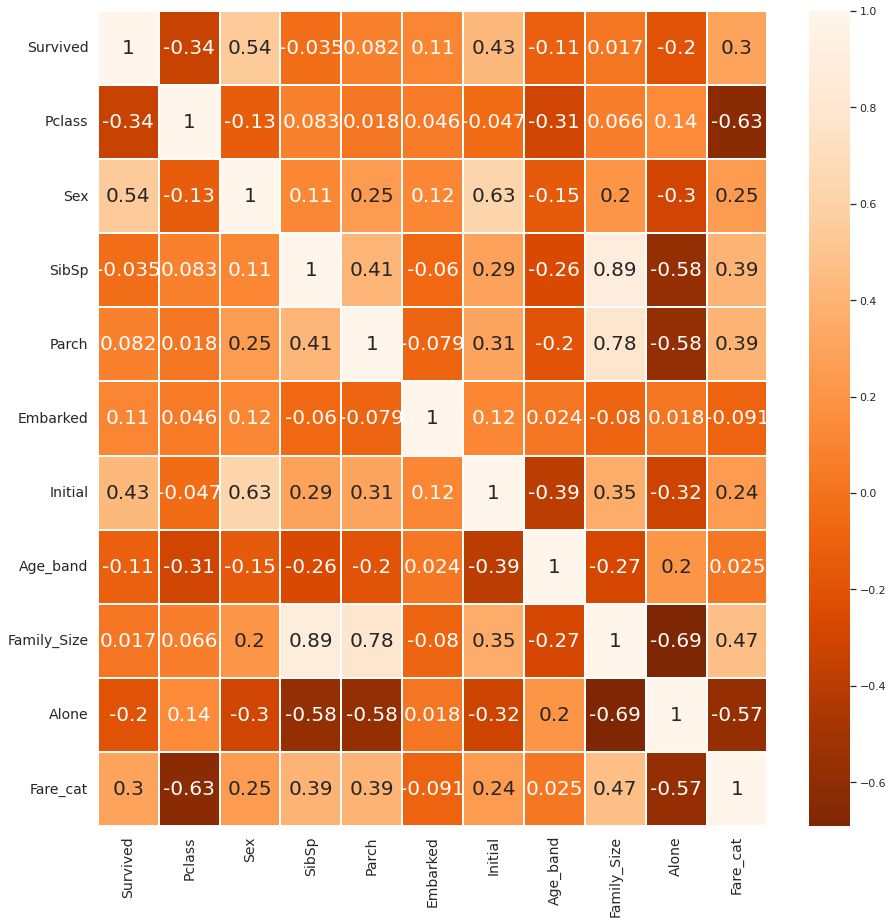

In [ ]:
train.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)

sns.heatmap(train.corr(), annot = True, cmap = 'Oranges_r', linewidths = 0.2, annot_kws = {'size' : 20})
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

SibSp, Family_Size와 Parch 가 양의 상관관계

Alone과 Family_Size는 음의 상관관계

### Predictive Modeling

1) Random Foresr

2) Decision Tree


### 모델 패키기

In [ ]:
# 머신러닝 패키지
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split # training and testing data split
#from sklearn import metrics # accuracy measure
#from sklearn.metrics import confusion_matrix # confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### 데이터 분리

In [ ]:
train, test = train_test_split(train, test_size = 0.3, random_state = 100, stratify = train['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']

### Decision Tree

In [ ]:
model = DecisionTreeClassifier(max_depth = 7, random_state = 100)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print (classification_report(prediction1, test_Y))
print ('The accuracy of the Decision is ', metrics.accuracy_score(prediction1, test_Y))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.78      0.64      0.70        11

    accuracy                           0.76        25
   macro avg       0.76      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25

The accuracy of the Decision is  0.76


### 답안지 제출

In [ ]:
# 답안지 제출
submit1 = pd.read_csv("/content/drive/MyDrive/캐글/타이타닉/gender_submission.csv")
submit1

submit1.to_csv("/content/drive/MyDrive/캐글/타이타닉/Decision-tree.csv",index=False)

### Random Forests


In [ ]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)

print (classification_report(prediction2, test_Y))
print ('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction2, test_Y))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.78      0.64      0.70        11

    accuracy                           0.76        25
   macro avg       0.76      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25

The accuracy of the Random Forests is  0.76


In [ ]:
seed = 300
model = DecisionTreeClassifier(max_depth = 150,
                               random_state = seed)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)

print (classification_report(prediction2, test_Y))
print ('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction2, test_Y))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        22
           1       0.73      0.69      0.71        16

    accuracy                           0.76        38
   macro avg       0.76      0.75      0.75        38
weighted avg       0.76      0.76      0.76        38

The accuracy of the Random Forests is  0.7631578947368421


### 답안지 제출

In [ ]:
# 답안지 제출

submit = pd.read_csv("/content/drive/MyDrive/캐글/타이타닉/gender_submission.csv")
submit

submit.to_csv("/content/drive/MyDrive/캐글/타이타닉/Random-Forests.csv",index=False)

### SVM

In [ ]:
model = SVC(kernel= "rbf", C = 350, gamma = 'auto')
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)

print (classification_report(prediction3, test_Y))
print (accuracy_score(prediction3, test_Y))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.78      0.64      0.70        11

    accuracy                           0.76        25
   macro avg       0.76      0.75      0.75        25
weighted avg       0.76      0.76      0.76        25

0.76


### SVM 답안지

In [ ]:
# SVM 답안지
submit2 = pd.read_csv("/content/drive/MyDrive/캐글/타이타닉/gender_submission.csv")
submit2

submit2.to_csv("/content/drive/MyDrive/캐글/타이타닉/svm.csv",index=False)

### Cross Validation(교차검증)

In [ ]:
from sklearn.model_selection import KFold # K-Fold Cross Validation
from sklearn.model_selection import cross_val_score # 점수 평가
from sklearn.model_selection import cross_val_predict # 예측

kfold = KFold(n_splits = 10, random_state = 22, shuffle = True) # k = 10 , 데이터셋을  동일 크기의 10개의 서브셋으로 나눕니다.
xyz = []
accuracy = []
std = []
classifiers = ['Decision Tree', 'Random Forest']
models = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]

for i in models :
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std' : std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Decision Tree,0.746212,0.090482
Random Forest,0.764394,0.093918


<Axes: >

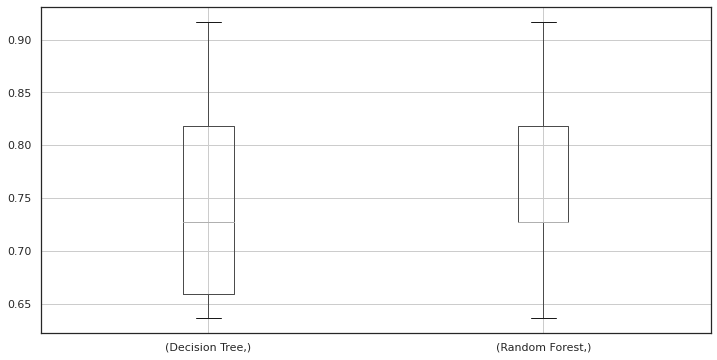

In [ ]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

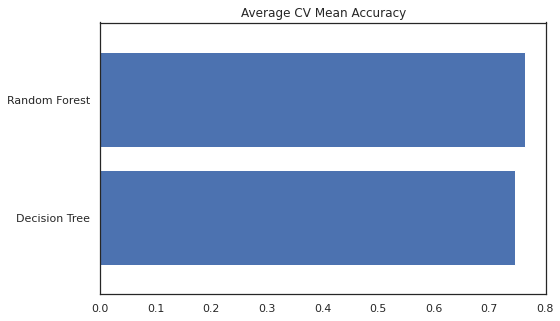

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix


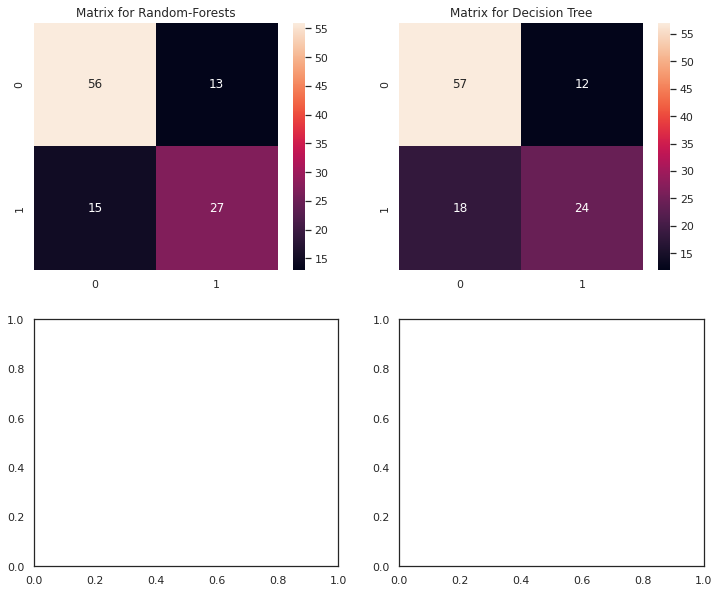

In [ ]:
# 혼동행렬은 분류기에 의해 나온 정확한, 또는 부정확한 분류의 개수

f, ax = plt.subplots(2, 2, figsize=(12,10))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt = '2.0f')
ax[0,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt = '2.0f')
ax[0,1].set_title('Matrix for Decision Tree')

plt.subplots_adjust(hspace=0.2, wspace = 0.2)
plt.show()

혼동행렬의 해석:

왼상단-우하단 대각선은 각 객체에 대해 정확한 예측의수,

우상단-좌하단 대각선은 잘못된 예측의 수


### 하이퍼 파라미터 튜닝

In [ ]:
n_estimators = range(100, 1000, 100)
hyper = { 'n_estimators' : n_estimators }
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7750988142292491
RandomForestClassifier(random_state=0)
